In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.axes as ax
import seaborn as sns


from sklearn.linear_model import LinearRegression

sns.set()

In [50]:
pd.options.display.float_format = '${:,.2f}'.format

In [51]:
movies_df = pd.read_csv("2013_movies.csv")

In [52]:
movies_df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,"$130,000,000.00",424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,"$200,000,000.00",409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,"$150,000,000.00",400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,"$76,000,000.00",368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,"$225,000,000.00",291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [53]:
movies_df["constant"] = 1

In [54]:
movies_df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,constant
0,The Hunger Games: Catching Fire,"$130,000,000.00",424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,"$200,000,000.00",409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1
2,Frozen,"$150,000,000.00",400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1
3,Despicable Me 2,"$76,000,000.00",368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1
4,Man of Steel,"$225,000,000.00",291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1


## Challenge 1

In [55]:
x = movies_df["constant"]
y = movies_df["DomesticTotalGross"]

x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [56]:
lr_model1 = LinearRegression()

In [57]:
lr_model1.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
lr_model1.coef_

array([[0.]])

In [59]:
lr_model1.intercept_

array([1.00596875e+08])

This model predicts Domestic Total Gross based on a constant term (same for all rows.) Because this constant provides no information about the Domestic Total Gross of a given movie, the model predicts the mean. 

In [60]:
y_pred = lr_model1.predict(x)

In [61]:
residuals = y-y_pred

Text(0.5,1,'Residuals Plot')

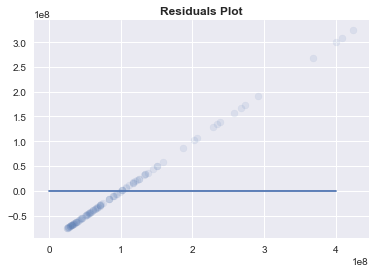

In [62]:
plt.scatter(y,y-y_pred,alpha=.1)
plt.plot(np.linspace(0,400000000,1000),np.linspace(0,0,1000))
plt.title("Residuals Plot", weight="bold")

Text(0.5,1,'Regression with Constant')

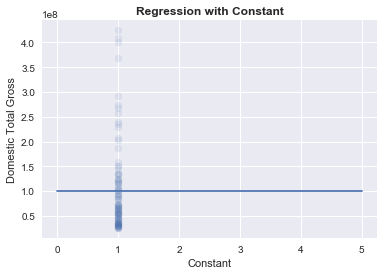

In [63]:
plt.scatter(x,y,alpha=.1)
vec1 = np.linspace(0,5,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1)
plt.xlabel("Constant")
plt.ylabel("Domestic Total Gross")
plt.title("Regression with Constant", weight="bold")

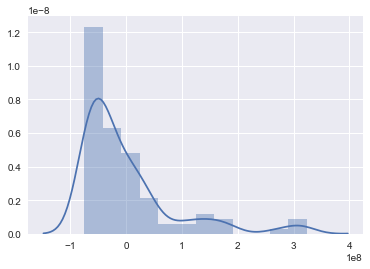

In [64]:
sns.distplot(residuals)

## Challenge 2

In [90]:
x = movies_df[["constant", "Runtime"]]
y = movies_df["DomesticTotalGross"]
y = np.array(y).reshape(-1,1)

In [91]:
lr_model2 = LinearRegression()
lr_model2.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[('constant', 0.0), ('Runtime', 1406054.2439104207)]
[-57246774.20138383]


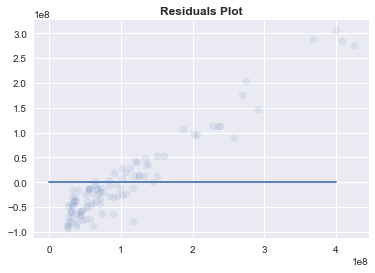

In [92]:
print(list(zip(x.columns, lr_model2.coef_[0])))

print(lr_model2.intercept_)

y_pred2 = lr_model2.predict(x)

residuals = y-y_pred2

plt.scatter(y,y-y_pred2,alpha=.1)
plt.plot(np.linspace(0,400000000,1000),np.linspace(0,0,1000))
plt.title("Residuals Plot", weight="bold");

In [93]:
run = np.array(x["Runtime"]).reshape(-1,1)

Text(0.5,1,'Regression with Constant')

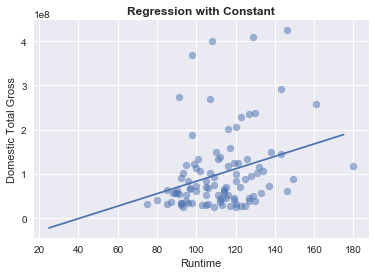

In [94]:
plt.scatter(run,y,alpha=.5)
vec1 = np.linspace(25,175,1000)
plt.plot(vec1, lr_model2.intercept_ + lr_model2.coef_[0][1]*vec1)
plt.xlabel("Runtime")
plt.ylabel("Domestic Total Gross")
plt.title("Regression with Constant", weight="bold")

In [95]:
lr_model2.score(x, y)

0.08564768236933151

This regression ignores the constant term (coefficient = 0) since it provides no information about the target variable.

## Challenge 3

In [70]:
rating_dummies = pd.get_dummies(movies_df.Rating).astype(int)
rating_dummies.shape

(100, 4)

In [71]:
movies_df = pd.concat([movies_df, rating_dummies], axis=1)

In [72]:
movies_df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,constant,G,PG,PG-13,R
0,The Hunger Games: Catching Fire,"$130,000,000.00",424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1,0,0,1,0
1,Iron Man 3,"$200,000,000.00",409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1,0,0,1,0
2,Frozen,"$150,000,000.00",400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1,0,1,0,0
3,Despicable Me 2,"$76,000,000.00",368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1,0,1,0,0
4,Man of Steel,"$225,000,000.00",291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1,0,0,1,0


In [73]:
x = movies_df[["constant", "Runtime","G","PG","PG-13","R"]]
y = movies_df["DomesticTotalGross"]
y = np.array(y).reshape(-1,1)

In [74]:
lr_model3 = LinearRegression()
lr_model3.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
list(zip(x.columns, lr_model3.coef_[0]))

[('constant', 0.0),
 ('Runtime', 1657183.0241812668),
 ('G', 126222128.50698648),
 ('PG', 575840.6112004272),
 ('PG-13', -48238917.83228086),
 ('R', -78559051.28590614)]

In [76]:
lr_model3.intercept_

array([-35047948.09438166])

In [77]:
y_pred3 = lr_model3.predict(x)

residuals = y-y_pred3

Text(0.5,1,'Domestic Total Gross Actual vs Predicted')

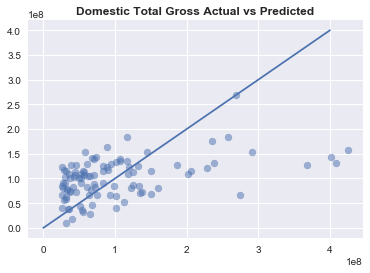

In [114]:
plt.scatter(y,y_pred3,alpha=.5)
plt.plot(np.linspace(0,400000000,1000),np.linspace(0,400000000,1000))
plt.title("Domestic Total Gross Actual vs Predicted", weight="bold")

Text(0.5,1,'Residuals Plot')

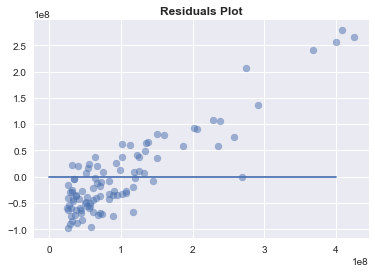

In [88]:
plt.scatter(y,y-y_pred3,alpha=.5)
plt.plot(np.linspace(0,400000000,1000),np.linspace(0,0,1000))
plt.title("Residuals Plot", weight="bold")

Again the model ignores the constant term. Adding in the rating improves the R^2 by about .13.

In [89]:
lr_model3.score(x, y)

0.21480483988134236

## Challenge 4

In [96]:
#sns.pairplot(movies_df)
movies_df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,constant,G,PG,PG-13,R
0,The Hunger Games: Catching Fire,"$130,000,000.00",424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1,0,0,1,0
1,Iron Man 3,"$200,000,000.00",409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1,0,0,1,0
2,Frozen,"$150,000,000.00",400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1,0,1,0,0
3,Despicable Me 2,"$76,000,000.00",368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1,0,1,0,0
4,Man of Steel,"$225,000,000.00",291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1,0,0,1,0


In [97]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
constant              100 non-null int64
G                     100 non-null int64
PG                    100 non-null int64
PG-13                 100 non-null int64
R                     100 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 9.5+ KB


In [98]:
movies_df = movies_df.fillna(0)

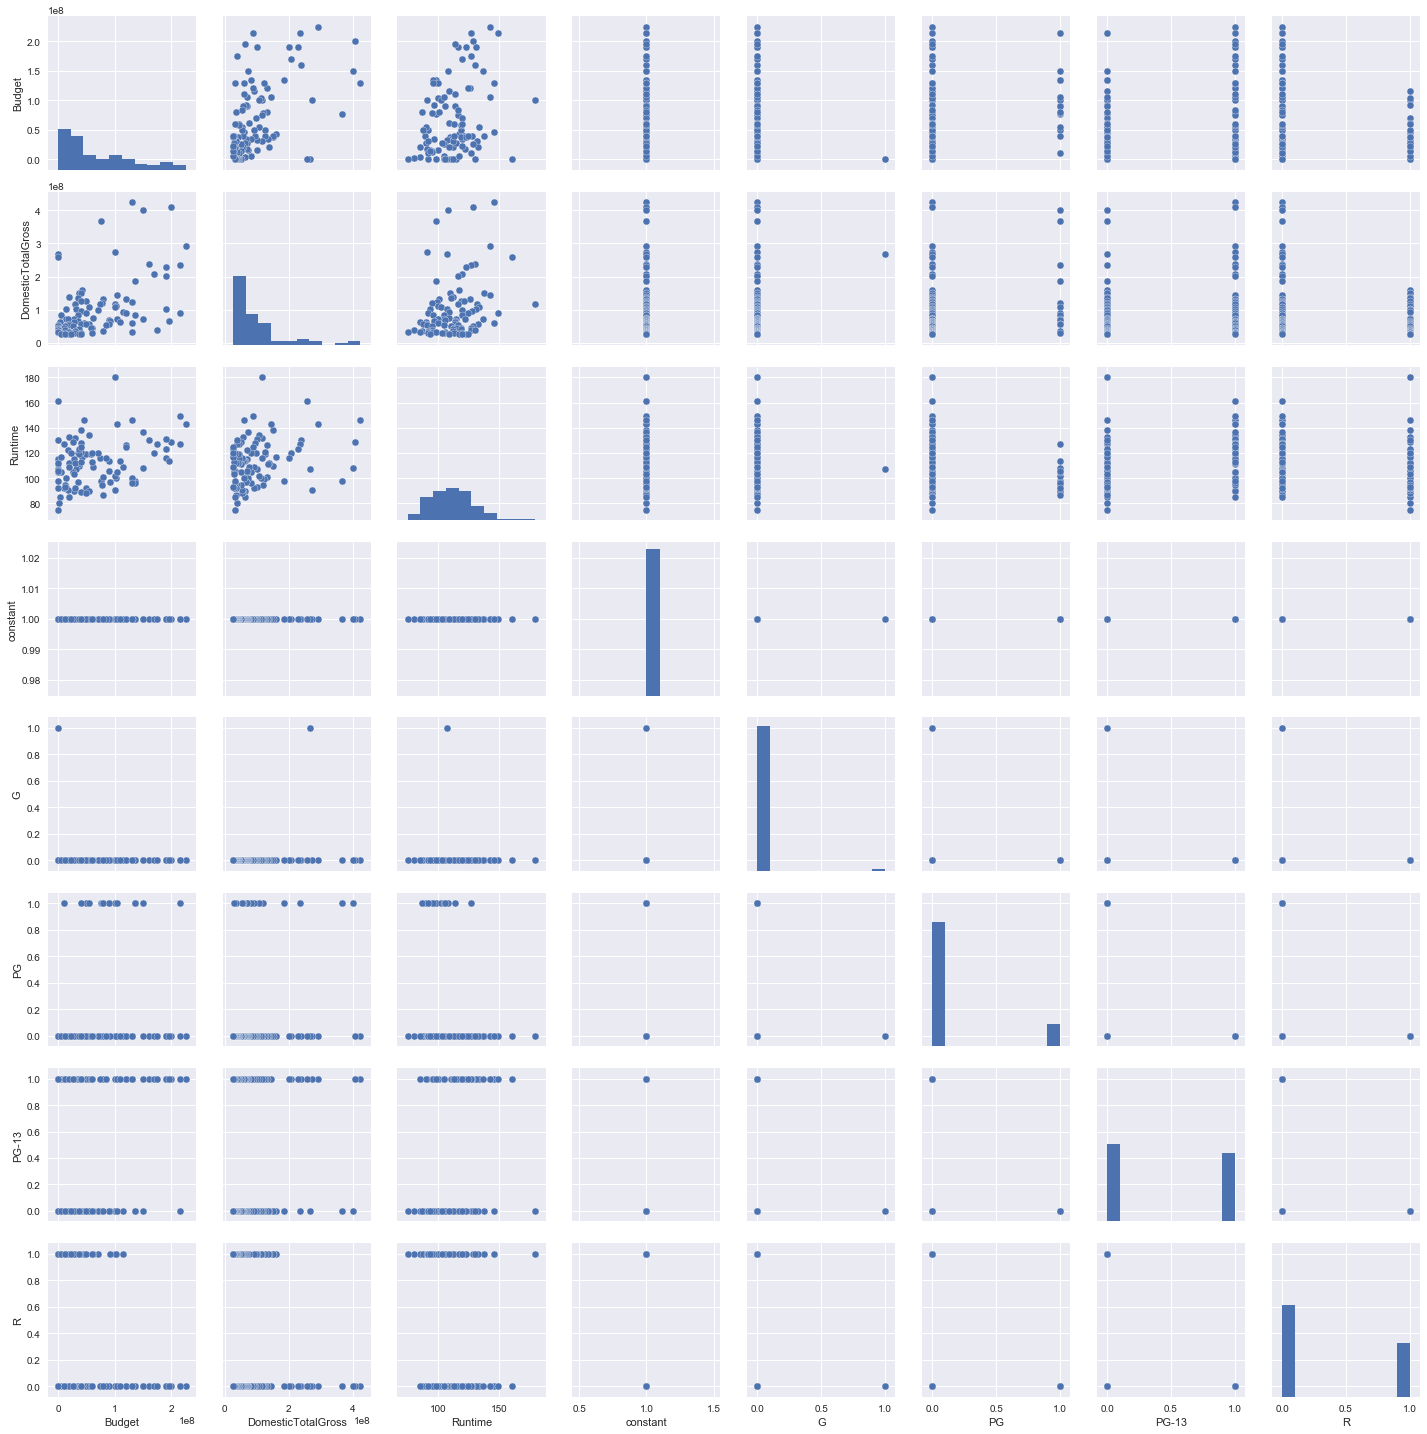

In [99]:
sns.pairplot(movies_df)

From the pairplot, it looks like Budget and Runtime could have a polynomial relationship with DTG. I will add in ^2 terms for these two features.

In [108]:
lr_model4 = LinearRegression()

In [101]:
movies_df.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate', 'constant', 'G', 'PG', 'PG-13', 'R'],
      dtype='object')

In [102]:
movies_df["Budget^2"] = movies_df["Budget"]**2
movies_df["Runtime^2"] = movies_df["Runtime"]**2

In [105]:
x = movies_df[["Budget", "Runtime", "G", "PG", "PG-13", "R", "Budget^2", "Runtime^2"]]
y = movies_df["DomesticTotalGross"]

In [109]:
lr_model4.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [111]:
lr_model4.score(x,y)

0.2694528834987554

Adding in the squared terms increases the R^2 slightly. 

Text(0.5,1,'Domestic Total Gross Actual vs Predicted')

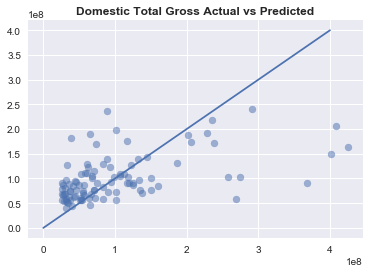

In [113]:
y_pred4 = lr_model4.predict(x)


plt.scatter(y,y_pred4,alpha=.5)
plt.plot(np.linspace(0,400000000,1000),np.linspace(0,400000000,1000))
plt.title("Domestic Total Gross Actual vs Predicted", weight="bold")



Text(0.5,1,'Residuals Plot')

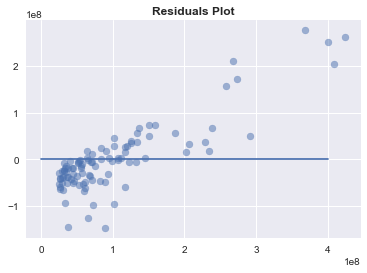

In [115]:
plt.scatter(y,y-y_pred4,alpha=.5)
plt.plot(np.linspace(0,400000000,1000),np.linspace(0,0,1000))
plt.title("Residuals Plot", weight="bold")

## Challenge 5

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
movies_df.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate', 'constant', 'G', 'PG', 'PG-13', 'R',
       'Budget^2', 'Runtime^2'],
      dtype='object')

In [137]:
x = movies_df[["Budget", "Runtime", "G", "PG", "PG-13", "R","Budget^2", "Runtime^2" ]]
y = movies_df["DomesticTotalGross"]

In [138]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=100)

In [139]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(75, 8)
(25, 8)
(75,)
(25,)


In [140]:
lr_model5 = LinearRegression()
lr_model5.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [141]:
list(zip(X_train.columns, lr_model5.coef_))

[('Budget', 0.3363127040702291),
 ('Runtime', 15.353172463253603),
 ('G', -0.0009356248415315526),
 ('PG', -0.08621703668096925),
 ('PG-13', 0.04681472359808016),
 ('R', 0.04033793792367652),
 ('Budget^2', 1.8708501414721468e-09),
 ('Runtime^2', 3771.0629742068554)]

In [142]:
lr_model5.score(X_train, y_train)

0.3046986080872385

In [143]:
lr_model5.score(X_test, y_test)

-0.1548944956272884

In [144]:
lr_model5.intercept_

19636573.790722534

In [145]:
y_pred_test = lr_model5.predict(X_test)

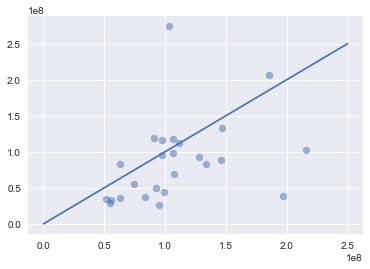

In [146]:
plt.scatter(y_pred_test,y_test,alpha=.5)
plt.plot(np.linspace(0,250000000,1000),np.linspace(0,250000000,1000))

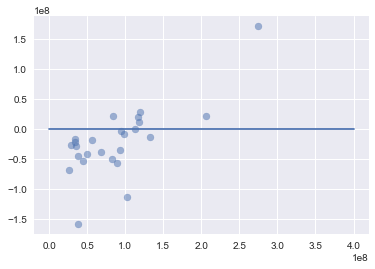

In [147]:
plt.scatter(y_test,y_test-y_pred_test,alpha=.5)
plt.plot(np.linspace(0,400000000,1000),np.linspace(0,0,1000))

After doing a train test split, it is clear that this model has overfit the training data. The R^2 on the test data is much lower. 

#### Try Lasso

In [149]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

In [150]:
lr_model5_lasso1 = LassoCV(cv=5)
lr_model5_lasso1.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [153]:
lr_model5_lasso1.score(X_train, y_train)

0.2694838713784977

In [154]:
lr_model5_lasso1.score(X_test, y_test)

-0.10947668305655145

Using Lasso regularization slightly improves the diffference in R^2 between the training and testing sets.